In [1]:
# Import Pandas and Numpy
import numpy as np
import pandas as pd

# Scikit-learn 
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics

# Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

ModuleNotFoundError: No module named 'graphviz'

In [2]:
# Load Boston dataset from Sklearn
boston = load_boston()

In [3]:
# This dataset is in a form of dictionary so we can check its keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


This dataset consists of 506 rows and 13 columns.

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Below we can check what the column names mean.

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Define the data/predictors as the pre-set feature names  
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(boston.target, columns=["MEDV"])

In [8]:
# Show first 5 rows
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


The summary statistics tells us that the mean house price was 22,533. The median was slightly lower at 21,200 which suggests that the distribution might be skewed to the right. The highest price a house was sold for was 50,000. The lowest price recorded was 5000.

/home/ivana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


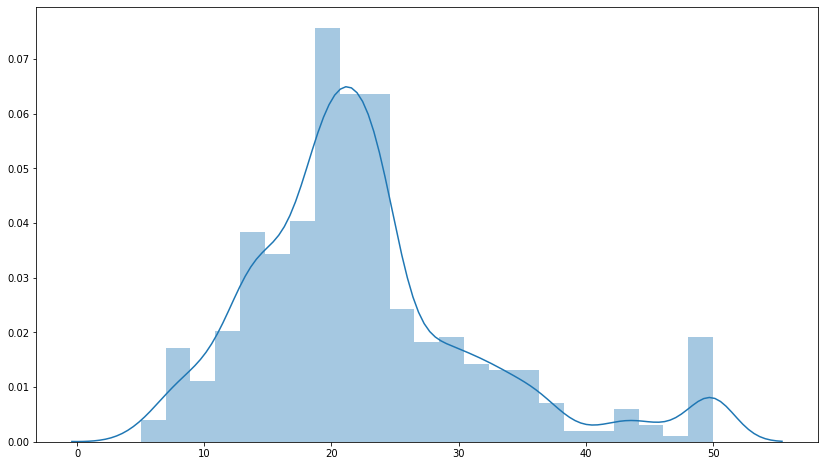

In [10]:
# Plot distribution of house prices
plt.figure(figsize=(14,8))
sns.distplot(y)

In [11]:
# Check for missing values
pd.isnull(X).any()


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [12]:
pd.isnull(y).any()

MEDV    False
dtype: bool

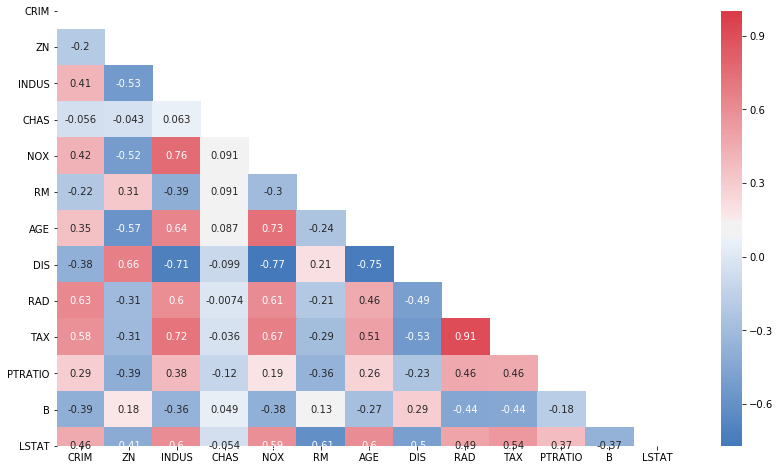

In [13]:
# Analyze correlation between the features
corr = X.corr(method='pearson')

# Plot the corelation heatmap
plt.figure(figsize=(14,8))
matrix = np.triu(corr) # take upper correlation matrix
sns.heatmap(corr, annot = True, mask=matrix, cmap=sns.diverging_palette(250, 10, n=3, as_cmap=True))

Attribute TAX shows high correlation with other attributes, especially RAD (index of accessibility to radial highways). Since Linear regression assumes that the variables are uncorrelated we will exclude TAX from modelling.

In [14]:
# Drop variable Tax
X = X.drop(['TAX'], axis=1)

Now we can split our dataset into train and test. This is done to prevent overfitting. We will train our model on 70% of data and test the model performance with the remaining 30%

In [15]:
# Split data on training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 12)
(152, 12)
(354, 1)
(152, 1)


## Multiple Linear regression

In [16]:
# Fit linear regression 
lm = linear_model.LinearRegression()
lm = lm.fit(X_train, y_train)

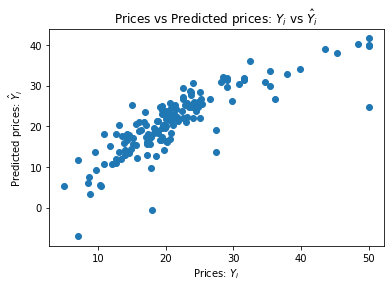

In [17]:
# Predict house prices and plot the differences between actual prices and predicted values 
lm_y_pred = lm.predict(X_test)

plt.scatter(y_test, lm_y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [18]:
# Look at the coefficients 
coef_values = pd.DataFrame(lm.coef_, index=['Coefficient']).transpose()
att_names = pd.DataFrame(X.columns, columns=['Attribute'])
coef_df = pd.concat([att_names,coef_values], axis=1, join='inner')
coef_df

,Attribute,Coefficient
0,CRIM,-0.132722
1,ZN,0.026249
2,INDUS,-0.007801
3,CHAS,3.338702
4,NOX,-16.139852
5,RM,4.114360
6,AGE,-0.011098
7,DIS,-1.366601
8,RAD,0.121465
9,PTRATIO,-0.939701


In [19]:
# Show the intercept of regression
lm.intercept_

array([30.39095377])

In [20]:
print('Coefficient of determination R^2 of the prediction: {:.2f}'.format(lm.score(X_test,y_test)))

Coefficient of determination R^2 of the prediction: 0.70


In [21]:
print('Mean Absolut Error: ', metrics.mean_absolute_error(y_test, lm_y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, lm_y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, lm_y_pred)))

Mean Absolut Error:  3.2412913600989595
Mean Squared Error:  22.47426702288998
Root Mean Squared Error:  4.74070322029232


## Decision Tree Regressor

In [22]:
# Fit decision tree 
decision_tree =  DecisionTreeRegressor(max_depth=5,random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [23]:
# Print feature importances
decision_tree.feature_importances_

array([0.06539339, 0.        , 0.        , 0.        , 0.00356871,
       0.61024907, 0.00397606, 0.10990886, 0.        , 0.00477547,
       0.00723224, 0.1948962 ])

In [ ]:
graph = Source(tree.export_graphviz(decision_tree, out_file=None
   , feature_names=X_train.columns, class_names=y_train.columns 
   , filled = True))

display(SVG(graph.pipe(format='svg')))